<a href="https://colab.research.google.com/github/seanthw/fcc_predict_health_costs_with_regression/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-07 10:19:28--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.008s  

2023-08-07 10:19:28 (5.75 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# dataset
df = dataset.copy()

# creating an instace of Label Encoder
le = LabelEncoder()

# using .fit_transform function to fit the label
# encoder and return encoded label
sex_label = le.fit_transform(df['sex'])
smoker_label = le.fit_transform(df['smoker'])
region_label = le.fit_transform(df['region'])

In [4]:
# removing the column 'sex', 'smoker', and 'region' from df
# as it is of no use now.
df.drop('sex', axis=1, inplace=True)
df.drop('smoker', axis=1, inplace=True)
df.drop('region', axis=1, inplace=True)

# appending the array to our dataframe
# with column name 'sex', 'smoker', and 'region'
df['sex'] = sex_label
df['smoker'] = smoker_label
df['region'] = region_label

# printing DataFrame
df

,age,bmi,children,expenses,sex,smoker,region
0,19,27.9,0,16884.92,0,1,3
1,18,33.8,1,1725.55,1,0,2
2,28,33.0,3,4449.46,1,0,2
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1
...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,0,1
1334,18,31.9,0,2205.98,0,0,0
1335,18,36.9,0,1629.83,0,0,2
1336,21,25.8,0,2007.95,0,0,3


In [5]:
# splitting data in training and tresting datasets
train_features = df.sample(frac=0.8, random_state=0)
test_features = df.drop(train_features.index)
train_dataset = train_features.copy()
test_dataset = test_features.copy()

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [6]:
# data normalizer byt turning it into a tensor
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

In [7]:
# define model architecture
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])
  return model

In [8]:
# build and compile model
model = build_and_compile_model(normalizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [9]:
# Train model
history = model.fit(
    train_dataset,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=600)

Epoch 1/600
27/27 [==============================] - 1s 18ms/step - loss: 12712.7432 - mae: 12712.7432 - mse: 301895360.0000 - val_loss: 14427.7715 - val_mae: 14427.7715 - val_mse: 363307968.0000
Epoch 2/600
27/27 [==============================] - 0s 4ms/step - loss: 12710.2080 - mae: 12710.2080 - mse: 301827040.0000 - val_loss: 14424.0479 - val_mae: 14424.0479 - val_mse: 363196352.0000
Epoch 3/600
27/27 [==============================] - 0s 4ms/step - loss: 12704.9678 - mae: 12704.9678 - mse: 301686048.0000 - val_loss: 14416.6143 - val_mae: 14416.6143 - val_mse: 362974016.0000
Epoch 4/600
27/27 [==============================] - 0s 4ms/step - loss: 12695.0908 - mae: 12695.0908 - mse: 301422080.0000 - val_loss: 14403.4414 - val_mae: 14403.4414 - val_mse: 362585856.0000
Epoch 5/600
27/27 [==============================] - 0s 3ms/step - loss: 12678.3223 - mae: 12678.3223 - mse: 300991616.0000 - val_loss: 14381.9531 - val_mae: 14381.9531 - val_mse: 361954976.0000
Epoch 6/600
27/27 [=====

9/9 - 0s - loss: 2102.6326 - mae: 2102.6326 - mse: 31907598.0000 - 75ms/epoch - 8ms/step
Testing set Mean Abs Error: 2102.63 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


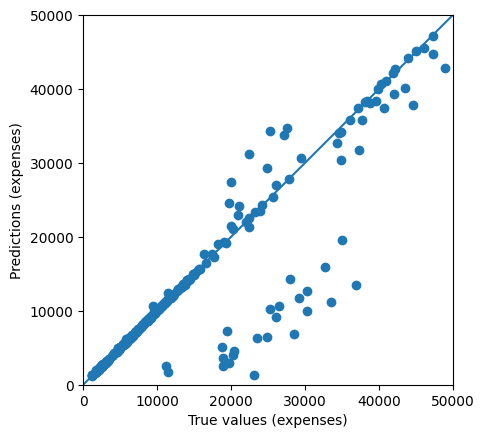

In [10]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
